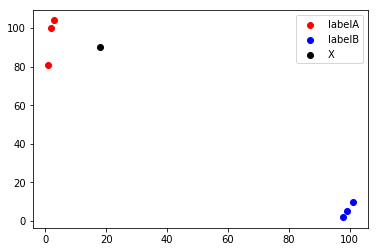

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import operator

# 已知分类的数据
x1 = np.array([3,2,1])
y1 = np.array([104,100,81])
x2 = np.array([101,99,98])
y2 = np.array([10,5,2])
scatter1 = plt.scatter(x1,y1,c='r')
scatter2 = plt.scatter(x2,y2,c='b')

# 未知数据
x = np.array([18])
y = np.array([90])
scatter3 = plt.scatter(x,y,c='k')

#画图例
plt.legend(handles=[scatter1,scatter2,scatter3],labels=['labelA','labelB','X'],loc='best')

plt.show()

In [ ]:
# 已知分类的数据
x_data = np.array([[3,104],
                   [2,100],
                   [1,81],
                   [101,10],
                   [99,5],
                   [81,2]])
y_data = np.array(['A','A','A','B','B','B'])
x_test = np.array([18,90])

In [ ]:
# 计算样本数量
x_data_size = x_data.shape[0]
x_data_size

6

In [ ]:
# 复制x_test
np.tile(x_test, (x_data_size,1))

array([[18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90]])

In [ ]:
# 计算x_test与每一个样本的差值
diffMat = np.tile(x_test, (x_data_size,1)) - x_data
diffMat

array([[ 15, -14],
       [ 16, -10],
       [ 17,   9],
       [-83,  80],
       [-81,  85],
       [-63,  88]])

In [ ]:
# 计算差值的平方
sqDiffMat = diffMat**2
sqDiffMat

array([[ 225,  196],
       [ 256,  100],
       [ 289,   81],
       [6889, 6400],
       [6561, 7225],
       [3969, 7744]], dtype=int32)

In [ ]:
# 求和
sqDistances = sqDiffMat.sum(axis=1)
sqDistances

array([  421,   356,   370, 13289, 13786, 11713], dtype=int32)

In [ ]:
# 开方
distances = sqDistances**0.5
distances

array([ 20.51828453,  18.86796226,  19.23538406, 115.27792503,
       117.41379817, 108.2266141 ])

In [ ]:
# 从小到大排序
sortedDistances = distances.argsort()
sortedDistances

array([1, 2, 0, 5, 3, 4], dtype=int64)

In [ ]:
classCount = {}
# 设置k
k = 5
for i in range(k):
    # 获取标签
    votelabel = y_data[sortedDistances[i]]
    # 统计标签数量
    classCount[votelabel] = classCount.get(votelabel,0) + 1

In [ ]:
classCount

{'A': 3, 'B': 2}

In [ ]:
# 根据operator.itemgetter(1)-第1个值对classCount排序，然后再取倒序
sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
sortedClassCount

[('A', 3), ('B', 2)]

In [ ]:
# 获取数量最多的标签
knnclass = sortedClassCount[0][0]
knnclass

'A'